In [1]:
import pandas as pd
from transformers import BertTokenizer
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Harsha\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=pd.read_csv(r"C:\Users\Harsha\Desktop\New folder\Dataset\training_data.csv")

In [3]:
df.shape

(153466, 4)

In [4]:
df=df.dropna()

In [5]:
df.shape

(153465, 4)

In [6]:
df.head()

,id,title,newsDatetime,currencies
0,873,ApeCoin Community Votes to Stay on Ethereum,06-09-2022 06:57,"ETH,APE"
1,876,Anchor dev claims he warned Do Kwon over unsus...,06-09-2022 05:39,LUNC
2,877,"With 12 Key Measures of Prices, Truflation’s R...",06-09-2022 05:32,XCN
3,879,Solana launches $100M fund to attract crypto p...,06-09-2022 05:20,"SOL,MATIC,FLOW"
4,885,Notice of removal of trading pairs. (2022-06-16),06-09-2022 03:13,BNB


In [7]:
# Split the 'currencies' column into separate rows
df = df.assign(currencies=df['currencies'].str.split(',')).explode('currencies').reset_index(drop=True)


In [8]:
df.shape

(233929, 4)

In [9]:
df.head()

,id,title,newsDatetime,currencies
0,873,ApeCoin Community Votes to Stay on Ethereum,06-09-2022 06:57,ETH
1,873,ApeCoin Community Votes to Stay on Ethereum,06-09-2022 06:57,APE
2,876,Anchor dev claims he warned Do Kwon over unsus...,06-09-2022 05:39,LUNC
3,877,"With 12 Key Measures of Prices, Truflation’s R...",06-09-2022 05:32,XCN
4,879,Solana launches $100M fund to attract crypto p...,06-09-2022 05:20,SOL


In [10]:
Number_of_stocks=len(df['currencies'].unique())
print(Number_of_stocks)

421


In [11]:
tokenizer = BertTokenizer.from_pretrained("ProsusAI/finbert")


df_temp = df

token_lengths = df_temp['title'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=True)))

C:\Users\Harsha\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


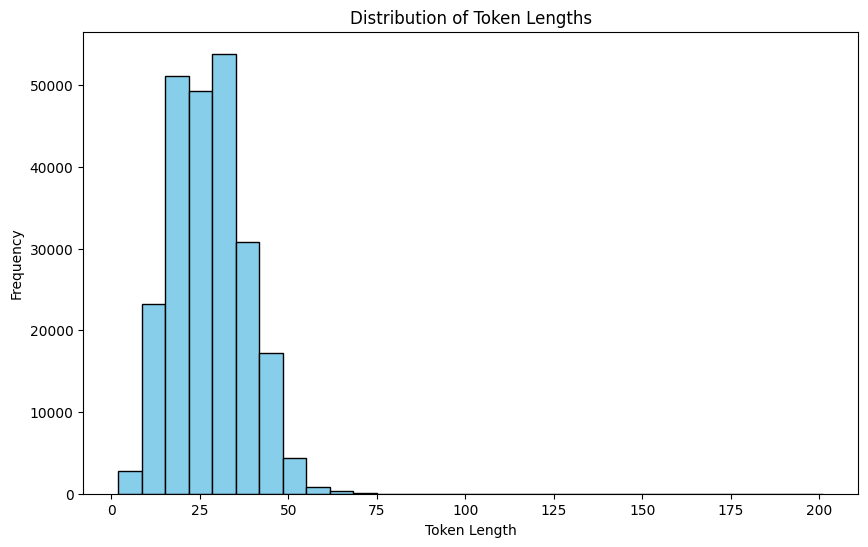

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(token_lengths, bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.show()

In [11]:
df['date'] = pd.to_datetime(df['newsDatetime'], errors='coerce',utc=True)

In [12]:
df.head()

,id,title,newsDatetime,currencies,date
0,873,ApeCoin Community Votes to Stay on Ethereum,06-09-2022 06:57,ETH,2022-06-09 06:57:00+00:00
1,873,ApeCoin Community Votes to Stay on Ethereum,06-09-2022 06:57,APE,2022-06-09 06:57:00+00:00
2,876,Anchor dev claims he warned Do Kwon over unsus...,06-09-2022 05:39,LUNC,2022-06-09 05:39:00+00:00
3,877,"With 12 Key Measures of Prices, Truflation’s R...",06-09-2022 05:32,XCN,2022-06-09 05:32:00+00:00
4,879,Solana launches $100M fund to attract crypto p...,06-09-2022 05:20,SOL,2022-06-09 05:20:00+00:00


In [13]:
df.isnull().sum()

id                   0
title                0
newsDatetime         0
currencies           0
date            134573
dtype: int64

### Few rows have different date format

In [14]:
# split the dataset into seperate dataframes to handle null values in date column
df2 = df[df['date'].isnull()]
df = df[~df['date'].isnull()]

In [15]:
df2.tail()

,id,title,newsDatetime,currencies,date
233924,163965,So now lets have a look on April\n\n#mogwai #c...,12/29/2020 17:05,MOG,NaT
233925,163966,Wow what a Year! \nLets have a look at March.\...,12/29/2020 14:43,MOG,NaT
233926,163967,Wow what a Year! \nLets have a look back on Fe...,12/29/2020 13:14,MOG,NaT
233927,163968,Wow what a Year! \nLets have a look at January...,12/29/2020 12:43,MOG,NaT
233928,163969,Wow what a Year! \nWe would like to thank all ...,12/29/2020 12:15,MOG,NaT


In [16]:
df2['date'] = pd.to_datetime(df2['newsDatetime'], format='%m/%d/%Y %H:%M', errors='coerce', utc=True)


In [17]:
df2.head()

,id,title,newsDatetime,currencies,date
172,1187,How This Achievement Brought Ethereum Closer T...,5/31/2022 18:00,BTC,2022-05-31 18:00:00+00:00
173,1187,How This Achievement Brought Ethereum Closer T...,5/31/2022 18:00,ETH,2022-05-31 18:00:00+00:00
174,1187,How This Achievement Brought Ethereum Closer T...,5/31/2022 18:00,SOL,2022-05-31 18:00:00+00:00
175,1187,How This Achievement Brought Ethereum Closer T...,5/31/2022 18:00,AVAX,2022-05-31 18:00:00+00:00
176,1187,How This Achievement Brought Ethereum Closer T...,5/31/2022 18:00,XCN,2022-05-31 18:00:00+00:00


In [18]:
df = pd.concat([df, df2], axis=0, ignore_index=True)


In [19]:
df.isnull().sum()

id              0
title           0
newsDatetime    0
currencies      0
date            0
dtype: int64

In [20]:
# Extract month and year into a new column
df['month_year'] = df['date'].apply(lambda x: x.strftime('%Y-%m'))

In [21]:
df.head()

,id,title,newsDatetime,currencies,date,month_year
0,873,ApeCoin Community Votes to Stay on Ethereum,06-09-2022 06:57,ETH,2022-06-09 06:57:00+00:00,2022-06
1,873,ApeCoin Community Votes to Stay on Ethereum,06-09-2022 06:57,APE,2022-06-09 06:57:00+00:00,2022-06
2,876,Anchor dev claims he warned Do Kwon over unsus...,06-09-2022 05:39,LUNC,2022-06-09 05:39:00+00:00,2022-06
3,877,"With 12 Key Measures of Prices, Truflation’s R...",06-09-2022 05:32,XCN,2022-06-09 05:32:00+00:00,2022-06
4,879,Solana launches $100M fund to attract crypto p...,06-09-2022 05:20,SOL,2022-06-09 05:20:00+00:00,2022-06


In [25]:
# Group by 'currencies' and 'month_year', and aggregate 'title' and 'date'
grouped = df.groupby(['currencies', 'month_year']).apply(lambda x: x[['title', 'date']].to_dict('records')).reset_index(name='data')


C:\Users\Harsha\AppData\Local\Temp\ipykernel_23572\1884985501.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby(['currencies', 'month_year']).apply(lambda x: x[['title', 'date']].to_dict('records')).reset_index(name='data')


In [29]:
grouped.tail()

,currencies,month_year,data
8794,ZRX,2023-07,[{'title': 'If they can deploy a bridge with o...
8795,ZRX,2023-09,[{'title': 'Will the CFTC Blot Out DeFi in the...
8796,ZRX,2024-03,[{'title': 'These Are The Ethereum Altcoins Wi...
8797,ZRX,2024-04,[{'title': '85% of Altcoins Are in Historic Bu...
8798,ZRX,2024-05,[{'title': 'Donald Trump’s Crypto Move In US E...


In [28]:
# Convert the grouped data into the desired dictionary structure
grouped_data = {}
for index, row in grouped.iterrows():
    currency = row['currencies']
    month_year = row['month_year']
    if currency not in grouped_data:
        grouped_data[currency] = {}
    grouped_data[currency][month_year] = row['data']

In [35]:
len(grouped_data)

421

In [36]:
import copy

# Deep copy the original grouped_data to ensure it's not modified
training_data = copy.deepcopy(grouped_data)

# Iterate over the copied dictionary and filter out month_year with less than 5 items
for currency in list(training_data.keys()):
    for month_year in list(training_data[currency].keys()):
        if len(training_data[currency][month_year]) < 5:
            del training_data[currency][month_year]

    # If a currency has no remaining month_year, remove the currency from the dictionary
    if not training_data[currency]:
        del training_data[currency]

In [37]:
len(grouped_data)

421

In [38]:
import json
import datetime

def format_datetime(dt):
    # Format the datetime object to a string without the timezone
    dt_str = dt.strftime('%Y-%m-%d %H:%M:%S')
    # Get the timezone offset in hours and minutes
    offset_hour = int(dt.utcoffset().total_seconds() / 3600)
    offset_min = int((dt.utcoffset().total_seconds() % 3600) / 60)
    # Format the timezone offset
    offset_str = f"{offset_hour:+03d}:{offset_min:02d}"
    # Combine the datetime string with the timezone offset
    return f"{dt_str}{offset_str}"

In [39]:
# File path for the .jsonl file
file_path = 'training_data.jsonl'

# Open the file in write mode
with open(file_path, 'w') as file:
    # Iterate over each currency in training_data
    for currency, month_years in training_data.items():
        # Iterate over each month_year and its corresponding data
        for month_year, entries in month_years.items():
            # Convert datetime objects to formatted strings in each entry
            for entry in entries:
                if isinstance(entry['date'], datetime.datetime):
                    entry['date'] = format_datetime(entry['date'])
            json_object = json.dumps({
                "currency": currency,
                "month_year": month_year,
                "data": entries
            })
            # Write the JSON object to the file with a newline character
            file.write(json_object + '\n')